### Fourier Transform element-wise matrix multiplication concept proof

In [2]:
%matplotlib inline

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage
import cmath
import math

### Read an Image as grayscale

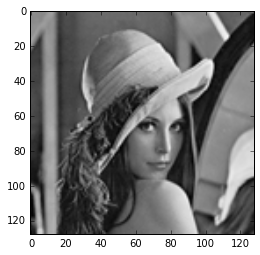

In [3]:
face = misc.imread('lena128.jpg', 'L')

plt.imshow(face, cmap=plt.cm.gray)
plt.show()

### Convolute small kernel with the picture
$K = \begin{bmatrix}
        -1 & -1 & -1 \\
        -1 & 8 & -1 \\
        -1 & -1 & -1 \\
        \end{bmatrix}
$

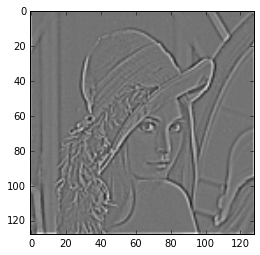

In [105]:
small_kernel = np.array([
        [-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]
    ])
face_conv_sm_kernel = ndimage.convolve(face, small_kernel, mode='constant', cval=0.0)
plt.imshow(face_conv_sm_kernel, cmap=plt.cm.gray)
plt.show()

# FFT POLAR section
do the $FFT$ of the image then separate the $Phase$ and $Magnitude$ into specify arrays
- left picture: plot of the Phase of $FFT$
- right picture: plot of the Magnitude of $FFT$
  
##### Problems
- still can't plot the magnitude

###### Solving
- try to map in range of (0-255)
    - this doesn't work, the original range might be too high
- mod the value by 255
    - can just plot, we can't see what the magnitude graph gives us

('max = ', 1000.0)
('min = ', 0.0)
('std = ', 8.0641621309186142)
('var = ', 464941.97486463172)
('mean = ', 1.5841594689492349)


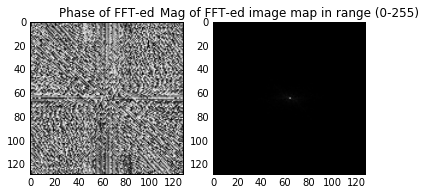

In [111]:
# do the fft of the image
face_fft = np.fft.fft2(face)
f1_fft = np.fft.fftshift(face_fft)

# loop to assign each number's phase into phase_face_fft
phase_face_fft = np.zeros((128,128))
magnitude_face_fft = np.zeros((128,128))
mod255_magnitude_face_fft = np.zeros((128,128))
for i in range(len(face_fft)):
    for j in range(len(face_fft)):
        phase_face_fft[i,j] = cmath.polar(f1_fft[i,j])[1]
        
#       map the original range to (0,1000)
        magnitude_face_fft[i,j] = (((cmath.polar(f1_fft[i,j])[0] - 10.706497090090899) * (1000 - 0)) /
                                    (1616794.0 - 10.706497090090899)) + 0
        
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# just for plotting        
plt.subplot(121)
plt.title("Phase of FFT-ed")
plt.imshow(phase_face_fft, cmap=plt.cm.gray)

plt.subplot(122)
plt.title("Mag of FFT-ed image map in range (0-255)")
plt.imshow(magnitude_face_fft, cmap=plt.cm.gray)

print("max = ", magnitude_face_fft.max(axis=0).max(axis=0))
print("min = ", magnitude_face_fft.min(axis=0).min(axis=0))
print("std = ", np.std(np.std(magnitude_face_fft, axis=0)))
print("var = ", np.var(np.var(magnitude_face_fft, axis=0)))
print("mean = ", np.mean(np.mean(magnitude_face_fft, axis=0)))

# FFT coordinate Section

do the $FFT$ of the image then plot the Real and Imaginary Part

- left picture: plot of the Real Part of $FFT$ Img
- right picture: plot of the Imag Part of $FFT$ Img

##### Why i see nothing
Try Shifting, got some value here <3

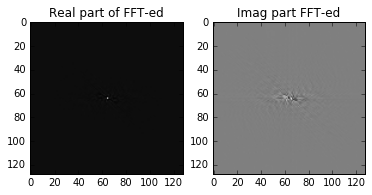

In [112]:
face_fft = np.fft.fft2(face)
f2_fft = np.fft.fftshift(face_fft)

r_face_fft = f2_fft.real
i_face_fft = f2_fft.imag

# just for plotting        
plt.subplot(121)
plt.title("Real part of FFT-ed")
plt.imshow(r_face_fft, cmap=plt.cm.gray)

plt.subplot(122)
plt.title("Imag part FFT-ed")
plt.imshow(i_face_fft, cmap=plt.cm.gray)

# Complex number element-wise testing

cool, the $*$ operation do the element-wise product for both real&imaginary part

In [69]:
a = np.array([
        [1-3j,1+3j],
        [2-5j,2+5j]
    ])

b = np.array([
        [1-3j,1+3j],
        [2-5j,2+5j]
    ])
print(a*b)

[[ -8. -6.j  -8. +6.j]
 [-21.-20.j -21.+20.j]]
